In [1]:
%%capture
%run "../src/read_data.py"

In [93]:
df = df_area_coloc
df.sort_index(level=("diet", "solution2"), ascending=(True, False), inplace=True)
idx = df.sum().sort_values(ascending=False).index
# idx = df.iloc[4:,:].sum().sort_values(ascending=False).index
# idx = df.iloc[4:,:].sum().sort_values(ascending=False).index
df = df.loc[:,idx]


In [94]:
df.iloc[:4,:]

,,,,,,Posterior hypothalamic nucleus,Paraventricular nucleus of the thalamus,"Subparafascicular nucleus, magnocellular part",Precommissural nucleus,Subparaventricular zone,"Lateral septal nucleus, ventral part",superior colliculus commissure,"Paraventricular hypothalamic nucleus, descending division",Anterior hypothalamic nucleus,Dorsomedial nucleus of the hypothalamus,...,"Postsubiculum, layer 2","Postsubiculum, layer 3","Presubiculum, layer 1","Presubiculum, layer 2","Presubiculum, layer 3","Subiculum, dorsal part","Subiculum, dorsal part, molecular layer","Subiculum, dorsal part, pyramidal layer","Subiculum, dorsal part, stratum radiatum",retina
mouse,diet,sex,solution1,solution2,celltype,,,,,,,,,,,,,,,,,,,,,
FT127,nr,male,casein,water,coloc,2096.084516,2075.197015,2030.975379,1685.510923,1401.907922,1842.223100,1508.451569,2119.070360,1360.950407,1213.707010,...,0,0,0,0,0,0,0,0,0,0
FT133,nr,male,casein,water,coloc,1648.632840,1790.548298,951.660302,1207.358457,898.582289,1016.667481,0.000000,1140.392698,963.277459,1160.760144,...,0,0,0,0,0,0,0,0,0,0
FT106,nr,male,casein,casein,coloc,1329.335867,351.812552,1773.114754,917.006503,841.046331,194.200669,154.907308,226.602306,721.519451,903.840856,...,0,0,0,0,0,0,0,0,0,0
FT118,nr,male,casein,casein,coloc,1551.948503,939.419298,979.619798,585.045003,1068.227501,940.940962,1032.061069,511.154876,1237.611944,1148.864367,...,0,0,0,0,0,0,0,0,0,0


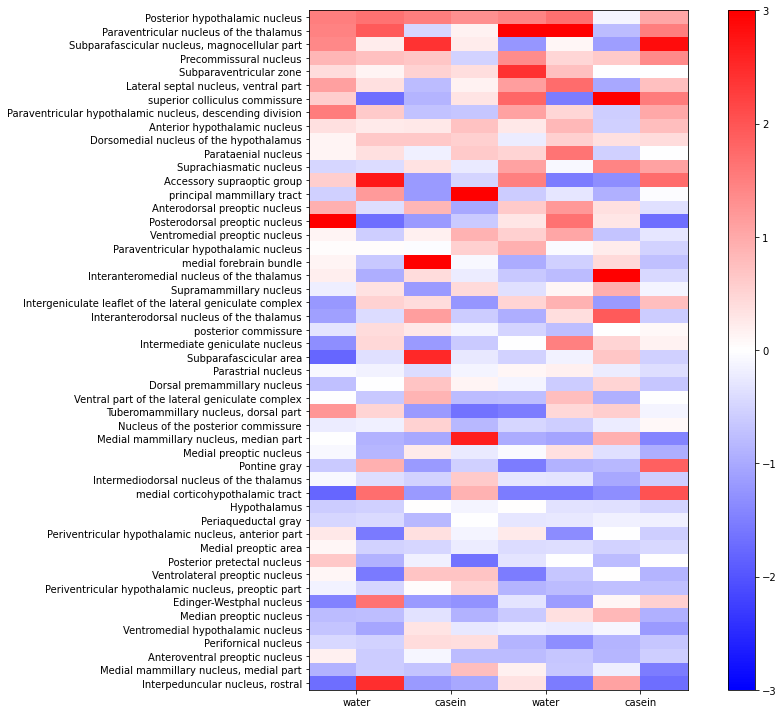

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore, norm

def fostrap_heatmap(df, n_regions=20, zscore_data=True):

    f, ax = plt.subplots(figsize=(8,n_regions/4), ncols=2, gridspec_kw={"width_ratios": [14,1]})

    data = np.array(df)[:,:n_regions].T
    regions = df.columns[:n_regions]
    cmap = "Greys"

    if zscore_data:
        data = zscore(data, axis=0)
        cmap="bwr"

    n_mice = np.shape(data)[1]

    xvals = np.arange(n_mice)
    yvals = np.arange(n_regions)
    (xx, yy) = np.meshgrid(xvals, yvals)

    mesh = ax[0].pcolormesh(xx, yy, data, cmap=cmap, shading="auto")
    if zscore_data:
        mesh.set_clim([-3,3])
    else:
        mu, std = norm.fit(data)
        mesh.set_clim([0, mu+3*std])

    ax[0].set_yticks(yvals)
    ax[0].set_yticklabels(regions)

    ax[0].set_xticks([0.5, 2.5, 4.5, 6.5])
    ax[0].set_xticklabels(["water", "casein", "water", "casein"])
    ax[0].invert_yaxis()

    cbar = f.colorbar(mesh, cax=ax[1])
    # ax[1].get_clim()

fostrap_heatmap(df, n_regions=50, zscore_data=True)

In [ ]:

mu, std = norm.fit(data)
print(mu, std)